# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Installing Pandas profiling

In [2]:
!pip install pandas-profiling

# Visualising Data

In [3]:
from pandas_profiling import ProfileReport
df = pd.read_csv('LabourTrainingEvaluationData.csv')
profile = ProfileReport(df)
profile.to_file(output_file = 'output.html')

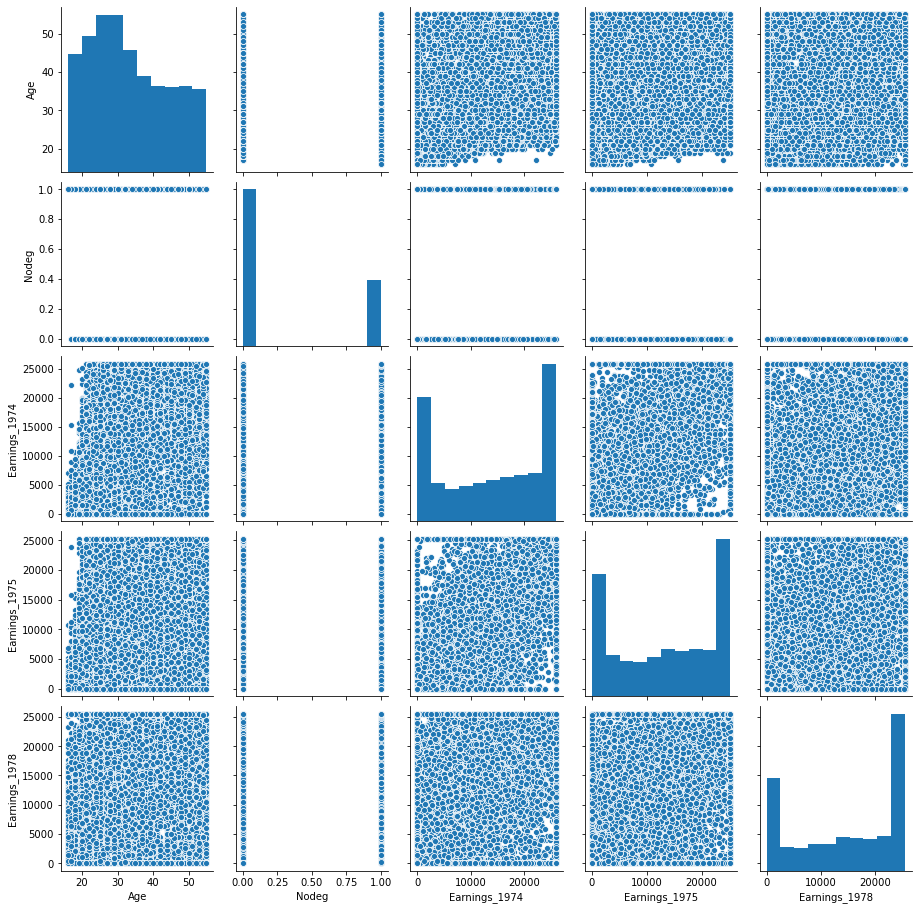

In [4]:
sns.pairplot(df)

C:\Users\Sharad\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


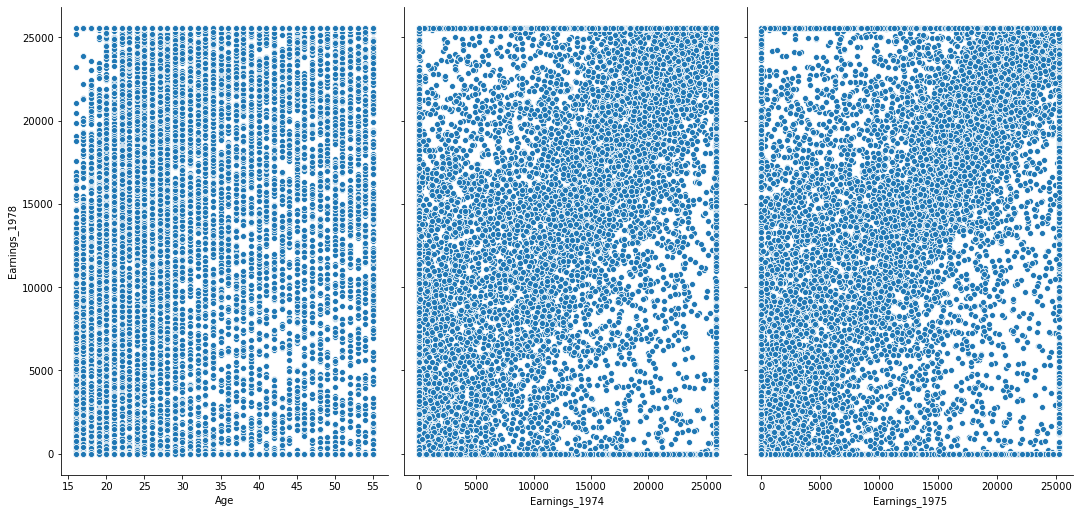

In [5]:
sns.pairplot(df, x_vars=['Age', 'Earnings_1974', 'Earnings_1975'], y_vars='Earnings_1978', size = 7, aspect = 0.7, kind = 'scatter')

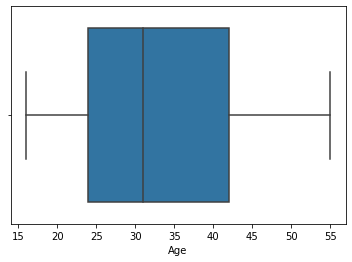

In [6]:
sns.boxplot(df['Age'])

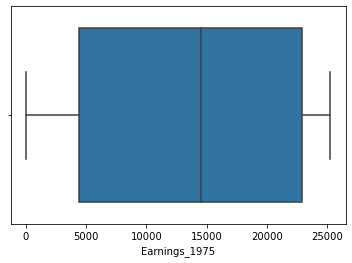

In [7]:
sns.boxplot(df['Earnings_1975'])

# Exploration of categorical variables

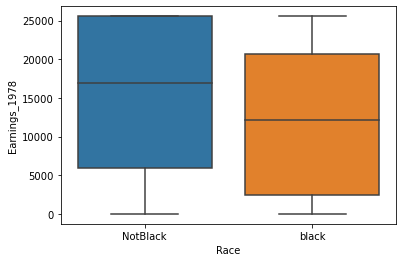

In [8]:
sns.boxplot(x = df['Race'], y = df['Earnings_1978'])

Median earning of non blacks is higher than blacks 

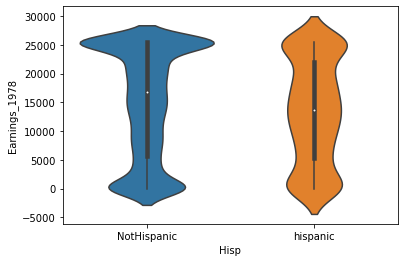

In [9]:
sns.violinplot(x = df['Hisp'], y = df['Earnings_1978'])

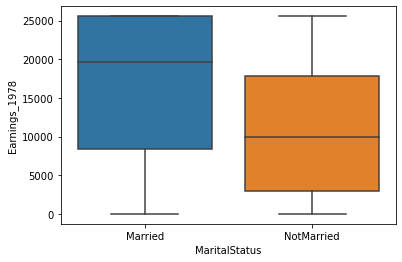

In [10]:
sns.boxplot(x = df['MaritalStatus'], y = df['Earnings_1978'])

Median earning of married labourers is higher unmarried labourers

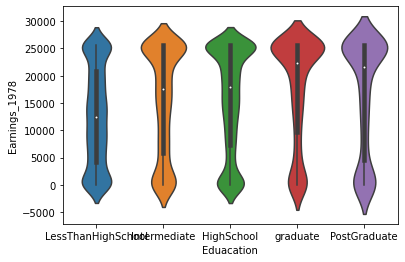

In [11]:
sns.violinplot(x = df['Eduacation'], y = df['Earnings_1978'])

# Separating numerical and categorical variables

In [12]:
df_num = df[['Age', 'Nodeg', 'Earnings_1974', 'Earnings_1975', 'Earnings_1978']]

In [13]:
df_dummies = pd.get_dummies(df[['Race', 'Eduacation', 'Hisp', 'MaritalStatus']])
df_dummies.head()

,Race_NotBlack,Race_black,Eduacation_HighSchool,Eduacation_Intermediate,Eduacation_LessThanHighSchool,Eduacation_PostGraduate,Eduacation_graduate,Hisp_NotHispanic,Hisp_hispanic,MaritalStatus_Married,MaritalStatus_NotMarried
0,1,0,0,0,1,0,0,1,0,1,0
1,1,0,0,1,0,0,0,1,0,0,1
2,1,0,1,0,0,0,0,1,0,1,0
3,1,0,0,0,1,0,0,1,0,1,0
4,1,0,0,0,1,0,0,1,0,1,0


In [14]:
df_combined = pd.concat([df_num, df_dummies], axis = 1)
df_combined.head()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978,Race_NotBlack,Race_black,Eduacation_HighSchool,Eduacation_Intermediate,Eduacation_LessThanHighSchool,Eduacation_PostGraduate,Eduacation_graduate,Hisp_NotHispanic,Hisp_hispanic,MaritalStatus_Married,MaritalStatus_NotMarried
0,45,1,21516.670,25243.550,25564.670,1,0,0,0,1,0,0,1,0,1,0
1,21,0,3175.971,5852.565,13496.080,1,0,0,1,0,0,0,1,0,0,1
2,38,0,23039.020,25130.760,25564.670,1,0,1,0,0,0,0,1,0,1,0
3,48,1,24994.370,25243.550,25564.670,1,0,0,0,1,0,0,1,0,1,0
4,18,1,1669.295,10727.610,9860.869,1,0,0,0,1,0,0,1,0,1,0


# Splitting the data into train and Test

In [15]:
x= df_combined[['Age', 'Nodeg', 'Earnings_1974', 'Earnings_1975', 'Race_NotBlack', 'Race_black', 'Eduacation_HighSchool',
                'Eduacation_Intermediate', 'Eduacation_LessThanHighSchool', 'Eduacation_PostGraduate', 'Eduacation_graduate',
                'Hisp_NotHispanic', 'Hisp_hispanic', 'MaritalStatus_Married', 'MaritalStatus_NotMarried']]
y = df['Earnings_1978']

In [16]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test = train_test_split(x, y, train_size = 0.7, random_state = 100)

# Performing Linear Regression using statsmodel

In [17]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

In [18]:
y_pred = lm.predict(x_test)

In [19]:
import statsmodels.api as sm
x_train_sm = x_train
x_train_sm = sm.add_constant(x_train_sm)
lm1 = sm.OLS(y_train, x_train_sm).fit()
lm1.params
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:          Earnings_1978   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.479
Method:                 Least Squares   F-statistic:                     1031.
Date:                Tue, 29 Sep 2020   Prob (F-statistic):               0.00
Time:                        17:00:41   Log-Likelihood:            -1.1490e+05
No. Observations:               11194   AIC:                         2.298e+05
Df Residuals:                   11183   BIC:                         2.299e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

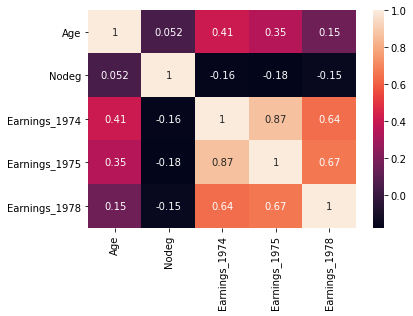

In [20]:
sns.heatmap(df.corr(), annot =True)

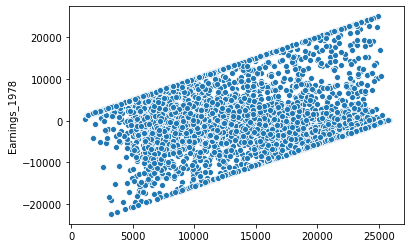

In [21]:
sns.scatterplot(x = y_pred, y = y_pred-y_test)

# Line plots of residuals

Text(0, 0.5, 'Earnings_1978')

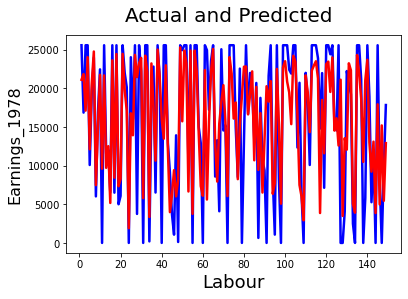

In [22]:
c = [i for i in range(1,150,1)]
fig = plt.figure()
plt.plot(c,y_test[1:150], color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred[1:150], color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Labour', fontsize=18)                               # X-label
plt.ylabel('Earnings_1978', fontsize=16)   

In [23]:
df_error = pd.DataFrame(y_test-y_pred)
df_error.sort_index(inplace = True)
df_error

,Earnings_1978
3,3700.493394
8,3451.002038
12,3976.992912
13,557.575524
15,-12163.276598
...,...
15971,3438.485704
15973,-7134.154833
15975,-19186.106369
15981,-3775.098609


In [24]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 50283398.72664995
r_square_value : 0.46392890870643755


In [26]:
from math import sqrt
rmse = sqrt(mse)
rmse

7091.078812610247